In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import zipfile
import pandas as pd

file_name = list(uploaded.keys())[0]

# If ZIP file uploaded
if file_name.endswith(".zip"):
    with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as z:
        z.extractall("data")
        csv_file = [f for f in z.namelist() if f.endswith(".csv")][0]
        df = pd.read_csv("data/" + csv_file)

# If CSV uploaded
else:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))

df.head()


Saving archive (2).zip to archive (2).zip


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df = df.rename(columns={"clean_text": "text", "category": "label"})
df.head()


,text,label
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
label_map = {-1: "negative", 0: "neutral", 1: "positive"}
df["sentiment"] = df["label"].map(label_map)

df.head()


,text,label,sentiment
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


In [ ]:
# Remove rows with missing text or label
df = df.dropna(subset=["text", "label"])

# Remove empty text rows
df = df[df["text"].str.strip().ne("")]

# Reset index
df = df.reset_index(drop=True)

print("Dataset size after cleaning:", df.shape)


Dataset size after cleaning: (162968, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows where 'label' (and thus 'sentiment') is NaN
df_cleaned = df.dropna(subset=['label']).reset_index(drop=True)

X = df_cleaned['text']
y = df_cleaned['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, Y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9267656623918512

Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.82      0.87      7023
     neutral       0.92      0.98      0.95     10978
    positive       0.94      0.94      0.94     14593

    accuracy                           0.93     32594
   macro avg       0.92      0.91      0.92     32594
weighted avg       0.93      0.93      0.93     32594



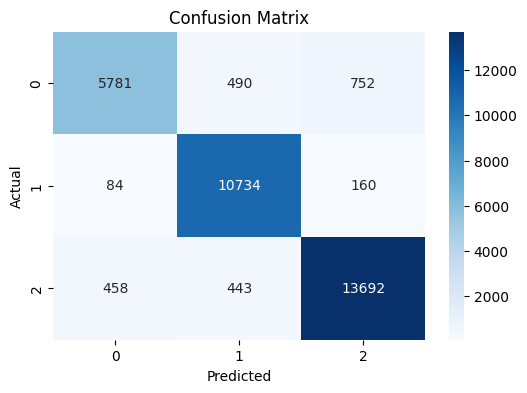

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def predict_sentiment(text):
    text = preprocess(text)
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]

print(predict_sentiment("I love this product!"))
print(predict_sentiment("Worst purchase ever."))

positive
negative
